Лабораторная работа №3
Кластерный анализ Веб-данных
Болотов М.В. АСУ4-22-1м

In [3]:
import requests                                                     # Импорт необходимых библиотек
import pandas as pd
from textblob import TextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
def get_mentions(search_query, num_results=10, location="Пермь"):                                  # Функция для получения упоминаний (заголовков новостей) по заданному запросу и местоположению
    base_url = "https://www.google.com/search"
    params = {
        "q": f"{search_query} {location} site:perm.ru",                                            # * Можно вставить любой город Пермского края и любой регион
        "num": num_results,
        "tbm": "nws",
    }

    response = requests.get(base_url, params=params)
    soup = BeautifulSoup(response.text, "html.parser")

    mentions = []

    for result in soup.find_all("div", class_="BNeawe vvjwJb AP7Wnd"):
        mentions.append(result.get_text())

    return mentions

def analyze_sentiment(text):                                                                        # Функция для анализа тональности текста при помощи TextBlob - работает неправильно (?)
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

def analyze_mentions_for_dishes(dishes, num_results=10):                                            # Функция для анализа упоминаний и тональности для списка блюд.
    sentiments_summary = {"Блюда": [], "Средняя тональность": [], "Количество упоминаний": []}

    for dish in dishes:
        search_query = dish.strip()
        mentions = get_mentions(search_query, num_results)
        sentiments = []

        for i, mention in enumerate(mentions, start=1):
            sentiment_score = analyze_sentiment(mention)
            sentiments.append(sentiment_score)

        average_sentiment = sum(sentiments) / len(sentiments) if sentiments else 0

        sentiments_summary["Блюда"].append(search_query)
        sentiments_summary["Средняя тональность"].append(average_sentiment)
        sentiments_summary["Количество упоминаний"].append(len(sentiments))

    return sentiments_summary

In [5]:
excel_file_path = r"C:\Users\79125\OneDrive\Рабочий стол\Учёба ПНИПУ АСУ\3 семестр\Интеллектуальный анализ Web данных\ЛР3\БЛЮДА.xlsx"  # Чтение данных из Excel
df = pd.read_excel(excel_file_path, header=None, names=['Блюда'])

dishes = df['Блюда'].tolist()                                                                                                          # Извлечение списка блюд из второго столбца таблицы

sentiments_summary = analyze_mentions_for_dishes(dishes)                                                                               # Проходим по каждому блюду и анализируем упоминания

result_df = pd.DataFrame(sentiments_summary)                                                                                           # Создаем датафрейм из результатов

result_excel_path = r"C:\Users\79125\OneDrive\Рабочий стол\Учёба ПНИПУ АСУ\3 семестр\Интеллектуальный анализ Web данных\ЛР3\Результаты.xlsx"  # Сохраняем результаты в Excel
result_df.to_excel(result_excel_path, index=False)

print(result_df)                                                                                                                       # Визуализация рейтинга

               Блюда  Средняя тональность  Количество упоминаний
0              Блюдо                  0.0                      9
1       Корниш пасти                  0.0                      0
2   Утка по-пекински                  0.0                      0
3    Циплята тандури                  0.0                      0
4               Суши                  0.0                      9
5           Фалафель                  0.0                      2
6             Хаггис                  0.0                      0
7             Паэлья                  0.0                      0
8             Кимчхи                  0.0                      0
9             Цезарь                  0.0                      7
10             Пицца                  0.0                     10
11              Борщ                  0.0                     10
12          Пельмени                  0.0                      9


Кластеризация, k-means анализ

c:\Users\79125\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


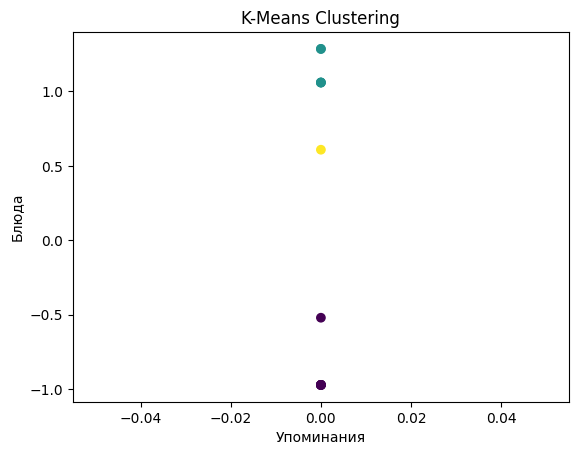

               Блюда  Средняя тональность  Количество упоминаний  Cluster
0              Блюдо                    0                      9        1
1       Корниш пасти                    0                      0        0
2   Утка по-пекински                    0                      0        0
3    Циплята тандури                    0                      0        0
4               Суши                    0                      9        1
5           Фалафель                    0                      2        0
6             Хаггис                    0                      0        0
7             Паэлья                    0                      0        0
8             Кимчхи                    0                      0        0
9             Цезарь                    0                      7        2
10             Пицца                    0                     10        1
11              Борщ                    0                     10        1
12          Пельмени                  

In [6]:
excel_file_path = r"C:\Users\79125\OneDrive\Рабочий стол\Учёба ПНИПУ АСУ\3 семестр\Интеллектуальный анализ Web данных\ЛР3\Результаты.xlsx" # Загрузка данных из созданного ексель файла
df = pd.read_excel(excel_file_path)

X = df.iloc[:, [1, 2]].values                                                          # Выделение признаков (в данном случае, колонок "Упоминания" и "Средняя тональность")

scaler = StandardScaler()                                                              # Стандартизация данных
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)                                         # Применение k-means
df["Cluster"] = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"], cmap='viridis')           # Визуализация результатов
plt.title('K-Means Clustering')
plt.xlabel('Упоминания')
plt.ylabel('Средняя тональность')
plt.show()

print(df)                                                                              # Вывод DataFrame с результатами кластеризации   *(возможно надо сделать анализ с выводами через средние значения по каждому кластеру, пробовал, получается криво)